In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from lxml import etree as et
import numpy as np

In [6]:
parser = et.XMLParser(recover=True)
tree=et.parse('/content/drive/My Drive/Stack/Posts.xml',parser=parser)
root=tree.getroot()
     

In [7]:
lis=[]
for child in root:
  dic=child.attrib
  lis.append(dic)
df=pd.DataFrame(lis)
df.to_csv("Posts.csv",index=False)

In [8]:
df=pd.read_csv("Posts.csv")
df.head()

,AcceptedAnswerId,AnswerCount,Body,ClosedDate,CommentCount,CommunityOwnedDate,CreationDate,FavoriteCount,Id,LastActivityDate,...,LastEditorDisplayName,LastEditorUserId,OwnerDisplayName,OwnerUserId,ParentId,PostTypeId,Score,Tags,Title,ViewCount
0,5.0,5.0,<p>I often hear about subatomic particles havi...,NaN,5,NaN,2010-11-02T18:59:01.140,27.0,1,2018-04-29T07:55:39.087,...,NaN,520.0,NaN,7.0,NaN,1,76,<quantum-mechanics><particle-physics><angular-...,What is spin as it relates to subatomic partic...,13803.0
1,5704.0,4.0,<p>How would you explain string theory to non ...,NaN,4,NaN,2010-11-02T19:09:48.680,8.0,2,2018-12-17T16:03:14.737,...,NaN,2451.0,NaN,23.0,NaN,1,29,<string-theory><education>,What is your simplest explanation of the strin...,2641.0
2,180.0,3.0,<p>This is a question that has been posted at ...,NaN,5,NaN,2010-11-02T19:11:05.857,13.0,3,2013-03-09T16:47:46.040,...,NaN,2451.0,NaN,40.0,NaN,1,35,<particle-physics><group-theory><representatio...,"Lie theory, Representations and particle physics",2412.0
3,NaN,NaN,<p>Imagine going to the rest frame of a massiv...,NaN,3,NaN,2010-11-02T19:12:26.543,NaN,4,2010-11-02T19:12:26.543,...,NaN,NaN,NaN,20.0,1.0,2,22,NaN,NaN,NaN
4,NaN,NaN,<p>Spin is a technical term specifically refer...,NaN,0,NaN,2010-11-02T19:15:20.813,NaN,5,2017-12-13T08:24:54.477,...,NaN,75633.0,NaN,13.0,1.0,2,48,NaN,NaN,NaN


In [9]:
df.shape

(345199, 21)

In [10]:
df=df.drop_duplicates()

Removing all the rows which doesn't have Tags,Title and Body also the PostTypeId's from 3 to 7.

In [11]:
df=df[~((df["Tags"].isnull())&(df["Title"].isnull())&(df["Body"].isnull()))]

In [12]:
df=df[~((df["PostTypeId"]==3) | (df["PostTypeId"]==4) | (df["PostTypeId"]==5) | (df["PostTypeId"]==6)  |(df["PostTypeId"]==7)) ]


In [13]:
df.shape

(343851, 21)

In [14]:
df.dtypes

AcceptedAnswerId         float64
AnswerCount              float64
Body                      object
ClosedDate                object
CommentCount               int64
CommunityOwnedDate        object
CreationDate              object
FavoriteCount            float64
Id                         int64
LastActivityDate          object
LastEditDate              object
LastEditorDisplayName     object
LastEditorUserId         float64
OwnerDisplayName          object
OwnerUserId              float64
ParentId                 float64
PostTypeId                 int64
Score                      int64
Tags                      object
Title                     object
ViewCount                float64
dtype: object

In [15]:
df.isnull().sum()


AcceptedAnswerId         283800
AnswerCount              205141
Body                          0
ClosedDate               322804
CommentCount                  0
CommunityOwnedDate       339818
CreationDate                  0
FavoriteCount            285575
Id                            0
LastActivityDate              0
LastEditDate             175492
LastEditorDisplayName    338050
LastEditorUserId         180821
OwnerDisplayName         331770
OwnerUserId                9583
ParentId                 138710
PostTypeId                    0
Score                         0
Tags                     205141
Title                    205141
ViewCount                205141
dtype: int64

In [16]:
df.drop(['Tags','AcceptedAnswerId', 'ClosedDate', 'CommunityOwnedDate', 'CreationDate',  'Id','LastActivityDate', 'LastEditDate', 'LastEditorDisplayName',
          'LastEditorUserId', 'OwnerDisplayName', 'OwnerUserId', 'ParentId','PostTypeId'],axis=1,inplace=True)

In [17]:
df.shape

(343851, 7)

In [18]:
df.describe()

,AnswerCount,CommentCount,FavoriteCount,Score,ViewCount
count,138710.000000,343851.000000,58276.000000,343851.000000,138710.000000
mean,1.478920,1.963126,2.413738,2.733905,1320.033566
std,1.307238,2.831835,5.486853,7.580154,6404.536977
min,0.000000,0.000000,0.000000,-24.000000,3.000000
25%,1.000000,0.000000,1.000000,0.000000,83.000000
50%,1.000000,1.000000,1.000000,1.000000,217.000000
75%,2.000000,3.000000,2.000000,3.000000,716.000000
max,49.000000,114.000000,502.000000,726.000000,785052.000000


In [19]:
print(df["AnswerCount"].mode(),df["CommentCount"].mode(),df["FavoriteCount"].mode(),df["ViewCount"].mode())

0    1.0
dtype: float64 0    0
dtype: int64 0    1.0
dtype: float64 0    50.0
dtype: float64


In [20]:
df["AnswerCount"]=df["AnswerCount"].fillna(1)
df["FavoriteCount"]=df["FavoriteCount"].fillna(1)
df["ViewCount"]=df["ViewCount"].fillna(50)
df["Title"]=df["Title"].fillna('none')

In [21]:
df.isnull().sum()

AnswerCount      0
Body             0
CommentCount     0
FavoriteCount    0
Score            0
Title            0
ViewCount        0
dtype: int64

In [22]:
df[df["AnswerCount"]>0]

,AnswerCount,Body,CommentCount,FavoriteCount,Score,Title,ViewCount
0,5.0,<p>I often hear about subatomic particles havi...,5,27.0,76,What is spin as it relates to subatomic partic...,13803.0
1,4.0,<p>How would you explain string theory to non ...,4,8.0,29,What is your simplest explanation of the strin...,2641.0
2,3.0,<p>This is a question that has been posted at ...,5,13.0,35,"Lie theory, Representations and particle physics",2412.0
3,1.0,<p>Imagine going to the rest frame of a massiv...,3,1.0,22,none,50.0
4,1.0,<p>Spin is a technical term specifically refer...,0,1.0,48,none,50.0
...,...,...,...,...,...,...,...
345187,1.0,"<p>In Peskin, it only says that:</p>\n\n<block...",0,1.0,0,none,50.0
345190,1.0,<p>Between the Schrödinger and Heisenberg pict...,0,1.0,0,none,50.0
345193,1.0,<p>The simple dependence of the action allows ...,0,1.0,0,none,50.0
345195,1.0,"<p>First of all, @Bill Watts is correct on eve...",0,1.0,0,none,50.0


Create Label for the dataset based on the given conditions



In [23]:
df[(df["Score"]>5) & (df["AnswerCount"]>=0)].shape

(38382, 7)

In [24]:
df[(df["Score"]>=0) &(df["Score"]<=5) & (df["AnswerCount"]>=0)].shape

(289348, 7)

In [25]:
df[(df["Score"]<0)].shape

(16121, 7)

In [26]:
import warnings
warnings.filterwarnings("ignore")

In [27]:
df1=df[(df["Score"]>5) & (df["AnswerCount"]>=0)]
df1["Quality"]=0
df2=df[(df["Score"]>=0) &(df["Score"]<=5) & (df["AnswerCount"]>=0)]
df2["Quality"]=1
df3=df[(df["Score"]<0)]
df3["Quality"]=2

In [28]:
df=pd.concat([df1,df2,df3],axis=0)
df.to_csv("LabeledPosts.csv",index=False)

In [29]:
df=pd.read_csv("LabeledPosts.csv")
df.head()

,AnswerCount,Body,CommentCount,FavoriteCount,Score,Title,ViewCount,Quality
0,5.0,<p>I often hear about subatomic particles havi...,5,27.0,76,What is spin as it relates to subatomic partic...,13803.0,0
1,4.0,<p>How would you explain string theory to non ...,4,8.0,29,What is your simplest explanation of the strin...,2641.0,0
2,3.0,<p>This is a question that has been posted at ...,5,13.0,35,"Lie theory, Representations and particle physics",2412.0,0
3,1.0,<p>Imagine going to the rest frame of a massiv...,3,1.0,22,none,50.0,0
4,1.0,<p>Spin is a technical term specifically refer...,0,1.0,48,none,50.0,0


In [30]:
df=df[~(df["Title"]=="none")]

In [31]:
df.isnull().sum()

AnswerCount      0
Body             0
CommentCount     0
FavoriteCount    0
Score            0
Title            0
ViewCount        0
Quality          0
dtype: int64

In [32]:
df["Quality"].value_counts()

1    114971
0     15785
2      7954
Name: Quality, dtype: int64

In [33]:
import re
def preprocess(text):
  lis=re.findall(r"\w+",text.lower())
  lis=[i for i in lis if i!="p"]
  return " ".join(lis)

In [34]:
df["Body"]=df["Body"].map(preprocess)

In [35]:
df["Title"]=df["Title"].map(preprocess)

In [36]:
import spacy
nlp=spacy.load("en_core_web_sm",disable=["parser", "ner"])

In [39]:
def preprocesss(text):
  doc=nlp(text)
  lis=[]
  for token in doc:
    if token.is_stop or token.like_email or token.like_url or token.is_digit:
      continue
    else:
      lis.append(token.lemma_)
  return " ".join(lis)

In [40]:
df["Body"]=df["Body"].map(preprocesss)

In [41]:
df["Title"]=df["Title"].map(preprocesss)

In [42]:
df.to_csv("newposts.csv",index=False)

In [43]:
df=pd.read_csv("newposts.csv")
df

,AnswerCount,Body,CommentCount,FavoriteCount,Score,Title,ViewCount,Quality
0,5.0,hear subatomic particle have property call spi...,5,27.0,76,spin relate subatomic particle,13803.0,0
1,4.0,explain string theory non physicist m speciall...,4,8.0,29,simple explanation string theory,2641.0,0
2,3.0,question post different forum think maybe well...,5,13.0,35,lie theory representation particle physic,2412.0,0
3,6.0,main problem need solve prove laplace s determ...,5,5.0,10,determinism possible,2033.0,0
4,6.0,hamilton s principle state dynamic system foll...,2,32.0,48,hamilton s principle,9277.0,0
...,...,...,...,...,...,...,...,...
138705,0.0,consider conductor connect battery conduct wir...,5,1.0,-1,electric current continue flow circuit despite...,25.0,2
138706,2.0,understand change length see different frame r...,8,1.0,-1,velocity relativistic momentum,46.0,2
138707,0.0,think quote awareness knowledge illusion free ...,3,1.0,-2,dominant physic s,47.0,2
138708,0.0,m physics m wonder vacuum base capillary bowl ...,1,1.0,-2,vacuum perpetual motion,16.0,2


<AxesSubplot:>

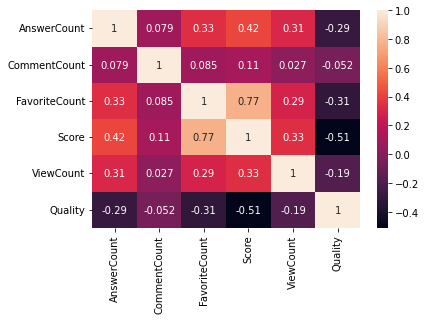

In [44]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

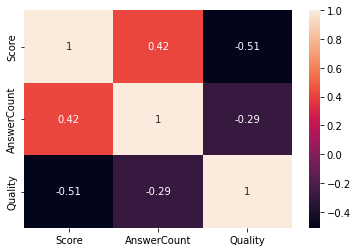

In [45]:
sns.heatmap(df[["Score","AnswerCount","Quality"]].corr(),annot=True)

In [46]:
df["Body"]=df["Body"].fillna(" ")
df["Title"]=df["Title"].fillna(" ")

Using text column as it is to verify the accuracy.

In [47]:
x=df[['AnswerCount','CommentCount','FavoriteCount','Score','ViewCount','Body','Title']]
y=df["Quality"]     

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,stratify=y)

In [49]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion

get_text1_data = FunctionTransformer(lambda x: x['Body'], validate=False)
get_text2_data = FunctionTransformer(lambda x: x['Title'], validate=False)
get_numeric_data = FunctionTransformer(lambda x: x[['AnswerCount','CommentCount','FavoriteCount','Score','ViewCount']], validate=False)

In [50]:
pipeline = Pipeline([
    ('features', FeatureUnion([
            ('numeric_features', Pipeline([
                ('selector', get_numeric_data),
                ('std',StandardScaler())
            ])),
             ('text1_features', Pipeline([
                ('selector', get_text1_data),
                ('vec', TfidfVectorizer(analyzer='word'))
            ])),
            ('text2_features', Pipeline([
                ('selector', get_text2_data),
                ('vec', TfidfVectorizer(analyzer='word'))
            ]))
         ])),
    ('clf', RandomForestClassifier())
])

In [51]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('numeric_features',
                                                 Pipeline(steps=[('selector',
                                                                  FunctionTransformer(func=<function <lambda> at 0x7f064fabde50>)),
                                                                 ('std',
                                                                  StandardScaler())])),
                                                ('text1_features',
                                                 Pipeline(steps=[('selector',
                                                                  FunctionTransformer(func=<function <lambda> at 0x7f064f8e2940>)),
                                                                 ('vec',
                                                                  TfidfVectorizer())])),
                                                ('text2_features',
                                                 Pipeline(steps=[('selector',
                                                                  FunctionTransformer(func=<function <lambda> at 0x7f064f8d3f70>)),
                                                                 ('vec',
                                                                  TfidfVectorizer())]))])),
                ('clf', RandomForestClassifier())])

In [52]:
y_pred=pipeline.predict(x_test)
y_pred

array([0, 1, 1, ..., 0, 2, 1])

In [53]:
y_pred.shape

(41613,)

In [54]:
y_test.shape

(41613,)

In [55]:
from sklearn.metrics import roc_auc_score,accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9282916396318458
              precision    recall  f1-score   support

           0       1.00      0.66      0.80      4736
           1       0.92      1.00      0.96     34491
           2       1.00      0.42      0.59      2386

    accuracy                           0.93     41613
   macro avg       0.97      0.69      0.78     41613
weighted avg       0.93      0.93      0.92     41613



In [56]:
y_pred=pipeline.predict_proba(x_test)

In [57]:
roc_auc_score(y_test,y_pred,multi_class='ovo')

0.9994488633687135

In [58]:
from sklearn.linear_model import LogisticRegression
pipeline = Pipeline([
    ('features', FeatureUnion([
            ('numeric_features', Pipeline([
                ('selector', get_numeric_data),
                ('std',StandardScaler())
            ])),
             ('text1_features', Pipeline([
                ('selector', get_text1_data),
                ('vec', TfidfVectorizer(analyzer='word'))
            ])),
            ('text2_features', Pipeline([
                ('selector', get_text2_data),
                ('vec', TfidfVectorizer(analyzer='word'))
            ]))
         ])),
    ('clf', LogisticRegression())
])

In [59]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('numeric_features',
                                                 Pipeline(steps=[('selector',
                                                                  FunctionTransformer(func=<function <lambda> at 0x7f064fabde50>)),
                                                                 ('std',
                                                                  StandardScaler())])),
                                                ('text1_features',
                                                 Pipeline(steps=[('selector',
                                                                  FunctionTransformer(func=<function <lambda> at 0x7f064f8e2940>)),
                                                                 ('vec',
                                                                  TfidfVectorizer())])),
                                                ('text2_features',
                                                 Pipeline(steps=[('selector',
                                                                  FunctionTransformer(func=<function <lambda> at 0x7f064f8d3f70>)),
                                                                 ('vec',
                                                                  TfidfVectorizer())]))])),
                ('clf', LogisticRegression())])

In [60]:
y_pred=pipeline.predict(x_test)

In [61]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4736
           1       1.00      1.00      1.00     34491
           2       1.00      1.00      1.00      2386

    accuracy                           1.00     41613
   macro avg       1.00      1.00      1.00     41613
weighted avg       1.00      1.00      1.00     41613



In [62]:
y_pred=pipeline.predict_proba(x_test)
roc_auc_score(y_test,y_pred,multi_class='ovr')

1.0

In [63]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
pipeline = Pipeline([
    ('features', FeatureUnion([
            ('numeric_features', Pipeline([
                ('selector', get_numeric_data),
                ('std',MinMaxScaler())
            ])),
             ('text1_features', Pipeline([
                ('selector', get_text1_data),
                ('vec', TfidfVectorizer(analyzer='word'))
            ])),
            ('text2_features', Pipeline([
                ('selector', get_text2_data),
                ('vec', TfidfVectorizer(analyzer='word'))
            ]))
         ])),
    ('clf', MultinomialNB())
])

In [64]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('numeric_features',
                                                 Pipeline(steps=[('selector',
                                                                  FunctionTransformer(func=<function <lambda> at 0x7f064fabde50>)),
                                                                 ('std',
                                                                  MinMaxScaler())])),
                                                ('text1_features',
                                                 Pipeline(steps=[('selector',
                                                                  FunctionTransformer(func=<function <lambda> at 0x7f064f8e2940>)),
                                                                 ('vec',
                                                                  TfidfVectorizer())])),
                                                ('text2_features',
                                                 Pipeline(steps=[('selector',
                                                                  FunctionTransformer(func=<function <lambda> at 0x7f064f8d3f70>)),
                                                                 ('vec',
                                                                  TfidfVectorizer())]))])),
                ('clf', MultinomialNB())])

In [65]:
y_pred=pipeline.predict(x_test)

In [66]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8288755917621897
              precision    recall  f1-score   support

           0       0.57      0.00      0.00      4736
           1       0.83      1.00      0.91     34491
           2       0.00      0.00      0.00      2386

    accuracy                           0.83     41613
   macro avg       0.47      0.33      0.30     41613
weighted avg       0.75      0.83      0.75     41613



In [67]:
y_pred=pipeline.predict_proba(x_test)
roc_auc_score(y_test,y_pred,multi_class='ovo')

0.6382037910512642

Using tfidfvectorizer on text columns after trained the model got 100% accuracy on LogisticRegression Model. Good accuracy for many simple data sets and it performs well when the dataset is linearly separable. Since the labeling done manually based on simple condition performed well.

***Now testing the dataset using bodylength and Titlelength as suggested.***

In [68]:
df=pd.read_csv("newposts.csv")
df.head()

,AnswerCount,Body,CommentCount,FavoriteCount,Score,Title,ViewCount,Quality
0,5.0,hear subatomic particle have property call spi...,5,27.0,76,spin relate subatomic particle,13803.0,0
1,4.0,explain string theory non physicist m speciall...,4,8.0,29,simple explanation string theory,2641.0,0
2,3.0,question post different forum think maybe well...,5,13.0,35,lie theory representation particle physic,2412.0,0
3,6.0,main problem need solve prove laplace s determ...,5,5.0,10,determinism possible,2033.0,0
4,6.0,hamilton s principle state dynamic system foll...,2,32.0,48,hamilton s principle,9277.0,0


In [69]:
def length(text):
  a=len(text)
  return a

In [70]:
df["Bodylength"]=df["Body"].apply(length)
df.head()

,AnswerCount,Body,CommentCount,FavoriteCount,Score,Title,ViewCount,Quality,Bodylength
0,5.0,hear subatomic particle have property call spi...,5,27.0,76,spin relate subatomic particle,13803.0,0,139
1,4.0,explain string theory non physicist m speciall...,4,8.0,29,simple explanation string theory,2641.0,0,92
2,3.0,question post different forum think maybe well...,5,13.0,35,lie theory representation particle physic,2412.0,0,379
3,6.0,main problem need solve prove laplace s determ...,5,5.0,10,determinism possible,2033.0,0,90
4,6.0,hamilton s principle state dynamic system foll...,2,32.0,48,hamilton s principle,9277.0,0,154


In [71]:
df["Title"]=df["Title"].astype("str")
df["Titlelength"]=df["Title"].apply(length)

In [72]:
df.head()

,AnswerCount,Body,CommentCount,FavoriteCount,Score,Title,ViewCount,Quality,Bodylength,Titlelength
0,5.0,hear subatomic particle have property call spi...,5,27.0,76,spin relate subatomic particle,13803.0,0,139,30
1,4.0,explain string theory non physicist m speciall...,4,8.0,29,simple explanation string theory,2641.0,0,92,32
2,3.0,question post different forum think maybe well...,5,13.0,35,lie theory representation particle physic,2412.0,0,379,41
3,6.0,main problem need solve prove laplace s determ...,5,5.0,10,determinism possible,2033.0,0,90,20
4,6.0,hamilton s principle state dynamic system foll...,2,32.0,48,hamilton s principle,9277.0,0,154,20


In [73]:
x=df[['AnswerCount','CommentCount','FavoriteCount','Score','ViewCount','Bodylength','Titlelength']]
y=df["Quality"]

In [74]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)

In [75]:
from collections import Counter 
from imblearn.under_sampling import RandomUnderSampler
us=RandomUnderSampler()
x_train_,y_train_=us.fit_resample(x_train,y_train)

In [76]:
Counter(y_train)

Counter({1: 80468, 0: 11063, 2: 5566})

In [77]:
Counter(y_train_)

Counter({0: 5566, 1: 5566, 2: 5566})

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import svm

In [79]:
pipe_lr = Pipeline([('pca',PCA()),
                    ('scl', StandardScaler()),
                    ('LR', LogisticRegression(random_state=2022))])
pipe_rf = Pipeline([('pca',PCA()),
                    ('scl', StandardScaler()),
                    ('RF',RandomForestClassifier(random_state=2022))])
pipe_svm = Pipeline([('pca',PCA()),
                     ('scl', StandardScaler()),
                     ('SVM', svm.SVC(random_state=2022,probability=True))])
pipe_xgb = Pipeline([('pca',PCA()),
                     ('scl', StandardScaler()),
                     ('XGB', XGBClassifier(random_state=2022))])

In [80]:
lr_param_grid = [{'LR__penalty': ['l2'],'LR__C':[2.0]}]
rf_param_grid = [{'RF__criterion':['gini'],'RF__n_estimators':[10]}]
svm_param_grid = [{'SVM__kernel': ['linear', 'rbf'], 'SVM__C':[6]}]
xgb_param_grid = [{'XGB__learning_rate': [0.3,0.5,0.6,0.8,1.0],'XGB__max_depth':[6]}]
cv=StratifiedKFold(n_splits=3)

In [81]:
lr_grid_search = GridSearchCV(estimator=pipe_lr,
        param_grid=lr_param_grid,
        scoring='roc_auc',
        cv=cv)
rf_grid_search = GridSearchCV(estimator=pipe_rf,
        param_grid=rf_param_grid,
        scoring='roc_auc',
        cv=cv)
svm_grid_search = GridSearchCV(estimator=pipe_svm,
        param_grid=svm_param_grid,
        scoring='roc_auc',
        cv=cv)
xgb_grid_search = GridSearchCV(estimator=pipe_xgb,
        param_grid=xgb_param_grid,
        scoring='roc_auc',
        cv=cv)

In [82]:
grids = [lr_grid_search, rf_grid_search, svm_grid_search, xgb_grid_search]
for pipe in grids:
    pipe.fit(x_train_,y_train_)

In [83]:
from sklearn.metrics import roc_auc_score
grid_dict = {0: 'Logistic Regression', 1: 'Random Forest', 2: 'Support Vector Machines', 3: 'XGBoost'}
for i, model in enumerate(grids):
  y_predi=model.predict_proba(x_test)
  print('{} Test Accuracy: {}'.format(grid_dict[i],roc_auc_score(y_test,y_predi,multi_class="ovo")))
  y_pred=model.predict(x_test)
  print(classification_report(y_test,y_pred))

Logistic Regression Test Accuracy: 0.9999582860708073
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4722
           1       1.00      0.99      1.00     34503
           2       0.98      1.00      0.99      2388

    accuracy                           0.99     41613
   macro avg       0.98      1.00      0.99     41613
weighted avg       0.99      0.99      0.99     41613

Random Forest Test Accuracy: 0.99794596700428
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      4722
           1       1.00      0.96      0.98     34503
           2       0.86      0.98      0.91      2388

    accuracy                           0.96     41613
   macro avg       0.89      0.98      0.93     41613
weighted avg       0.97      0.96      0.97     41613

Support Vector Machines Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1

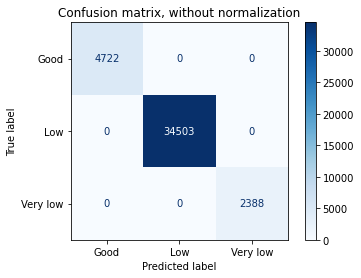

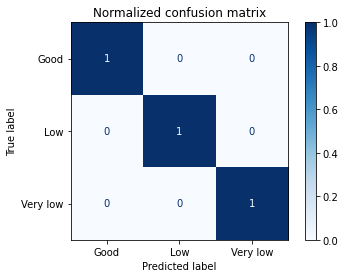

In [84]:
from sklearn.metrics import ConfusionMatrixDisplay
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        svm_grid_search,
        x_test,
        y_test,
        display_labels=["Good","Low","Very low"],
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)
plt.show()

Support vector machines (SVM) and Logistic performs better.